In [1]:
import pandas as pd
import shapefile
import geopandas as gpd
import matplotlib.pyplot as plt

ch = gpd.read_file("../Data/Reisezeit_OeV_2011.shp")
ch.head()

ModuleNotFoundError: No module named 'shapefile'

In [3]:
#Pendler nach Gemeinde laden
pendlerData = pd.read_csv('../Data/Pendler_nach_Gemeinde_2013-17kumuliert.csv', delimiter=';')
pendlerData

,Gemeinde,Ständige Wohnbevölkerung\nab 15 Jahren,Total Arbeitspendler,Wegpendler,Zupendler,Binnenpendler
0,Affoltern am Albis,9’341,5’278,4’022,4’055,1’256
1,Bassersdorf,9’595,5’518,5’024,2’480,494
2,Bülach,16’526,9’289,7’321,6’395,1’968
3,Kloten,15’543,8’801,6’440,19’779,2’361
4,Opfikon,15’464,9’105,7’908,13’004,1’197
...,...,...,...,...,...,...
157,Plan-les-Ouates,8’359,4’095,3’590,4’827,505
158,Thônex,11’359,4’634,4’266,1’496,369
159,Vernier,25’935,11’065,9’626,8’051,1’439
160,Versoix,9’198,3’986,3’311,1’622,675


In [4]:
#Daten bereinigen
pendlerData = pendlerData.rename(columns={'Gemeinde':'NAME'})
pendlerData = pendlerData.rename(columns={'Ständige Wohnbevölkerung\nab 15 Jahren':'Bevoelkerung'})
pendlerData['NAME'] = pendlerData['NAME'].str.strip()
pendlerData['Bevoelkerung'] = pendlerData['Bevoelkerung'].str.replace('\’', '')
pendlerData = pendlerData.astype({'Bevoelkerung': 'int64'})
pendlerData['Total Arbeitspendler'] = pendlerData['Total Arbeitspendler'].str.replace('\’', '')
pendlerData = pendlerData.astype({'Total Arbeitspendler': 'int64'})
pendlerData['Wegpendler'] = pendlerData['Wegpendler'].str.replace('\’', '')
pendlerData['Wegpendler'] = pendlerData['Wegpendler'].str.replace('\(', '')
pendlerData['Wegpendler'] = pendlerData['Wegpendler'].str.replace('\)', '')
pendlerData = pendlerData.astype({'Wegpendler': 'int64'})
pendlerData['Zupendler'] = pendlerData['Zupendler'].str.replace('\’', '')
pendlerData = pendlerData.astype({'Zupendler': 'int64'})
pendlerData['Binnenpendler'] = pendlerData['Binnenpendler'].str.replace('\’', '')
pendlerData = pendlerData.astype({'Binnenpendler': 'int64'})

#Ausgabe
pendlerData.head()

,NAME,Bevoelkerung,Total Arbeitspendler,Wegpendler,Zupendler,Binnenpendler
0,Affoltern am Albis,9341,5278,4022,4055,1256
1,Bassersdorf,9595,5518,5024,2480,494
2,Bülach,16526,9289,7321,6395,1968
3,Kloten,15543,8801,6440,19779,2361
4,Opfikon,15464,9105,7908,13004,1197


In [5]:
#Statistiken Total Pendler
pendlerData.sum()

NAME                    Affoltern am AlbisBassersdorfBülachKlotenOpfik...
Bevoelkerung                                                      3266157
Total Arbeitspendler                                              1730056
Wegpendler                                                        1010287
Zupendler                                                         1654537
Binnenpendler                                                      719774
dtype: object

In [6]:
#Deskriptive Statistik
pendlerData.describe()

,Bevoelkerung,Total Arbeitspendler,Wegpendler,Zupendler,Binnenpendler
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,20161.462963,10679.358025,6236.339506,10213.191358,4443.049383
std,32231.630260,18321.268558,6071.328941,21354.838224,12671.270336
min,4401.000000,2430.000000,195.000000,881.000000,295.000000
25%,9377.000000,4995.000000,3782.000000,3544.000000,1004.250000
50%,12848.000000,6566.500000,4766.500000,5679.500000,1561.500000
75%,17216.000000,9111.000000,6749.250000,8671.750000,2983.250000
max,329401.000000,196325.000000,58498.000000,228205.000000,137827.000000


In [7]:
ch['NAME'] = ch['NAME'].str.strip()
ch.head()

,GEM_NO,NAME,PLZ,KT_KZ,REISEZEIT,STAND,geometry
0,1,Aeugst am Albis,None,ZH,30,2011,"POLYGON Z ((678565.287 238071.843 0.000, 67863..."
1,2,Affoltern am Albis,None,ZH,22,2011,"POLYGON Z ((673825.324 238519.838 0.000, 67385..."
2,3,Bonstetten,None,ZH,15,2011,"POLYGON Z ((676750.285 243154.797 0.000, 67683..."
3,4,Hausen am Albis,None,ZH,29,2011,"POLYGON Z ((680610.308 236346.874 0.000, 68060..."
4,5,Hedingen,None,ZH,19,2011,"POLYGON Z ((675427.304 240961.774 0.000, 67544..."


In [8]:
pendlerDataMerged = pd.merge(ch,pendlerData,on=['NAME'])
pendlerDataMerged.dtypes

GEM_NO                     int64
NAME                      object
PLZ                       object
KT_KZ                     object
REISEZEIT                  int64
STAND                      int64
geometry                geometry
Bevoelkerung               int64
Total Arbeitspendler       int64
Wegpendler                 int64
Zupendler                  int64
Binnenpendler              int64
dtype: object

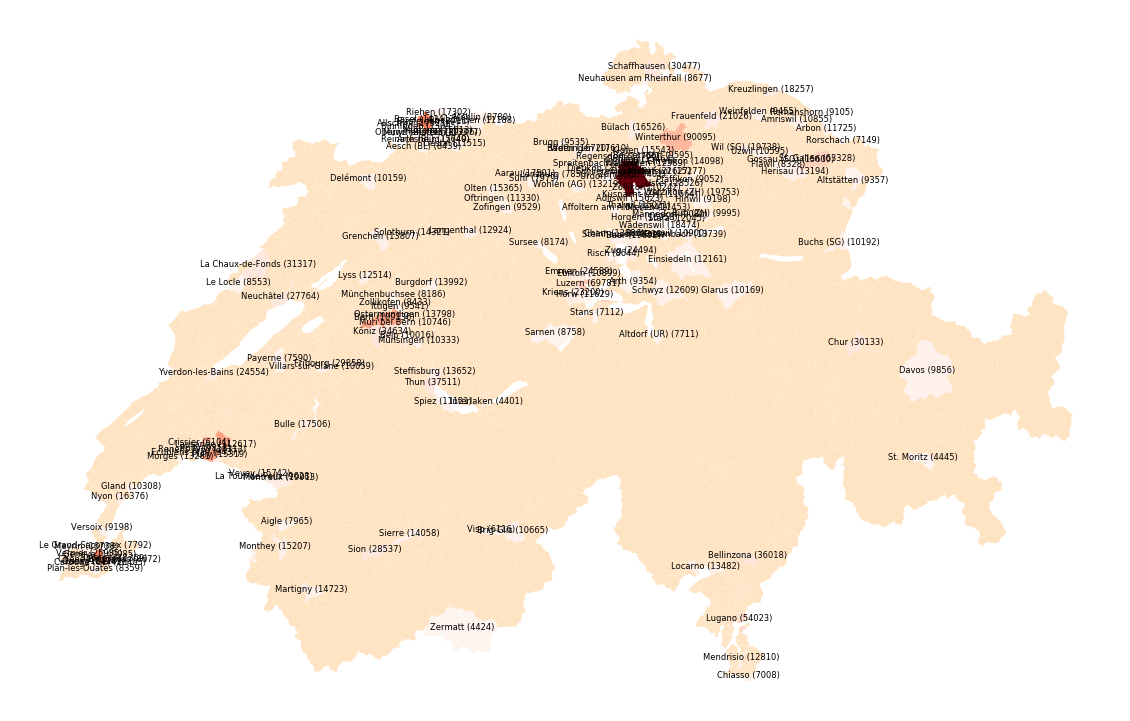

In [9]:
#Wohnbevölkerung ab 15Jahren
#Plot ganze Schweiz
ax = ch.plot(color='bisque',
            figsize=(20,20))

#Plot Gemeinden im Datensatz
pendlerDataMerged.plot(ax = ax, column='Bevoelkerung', cmap = 'Reds')

#Labels
pendlerDataMerged.apply(lambda x: ax.annotate(s="%s (%s)"%(x.NAME, x.Bevoelkerung), 
                                              xy=x.geometry.centroid.coords[0], 
                                              ha='center', 
                                              color = 'black', 
                                              fontsize='small'),axis=1);

plt.box(False)
plt.axis('off')
plt.savefig('../Grafiken/wohnbevölkerungAb15Jahren.pdf')

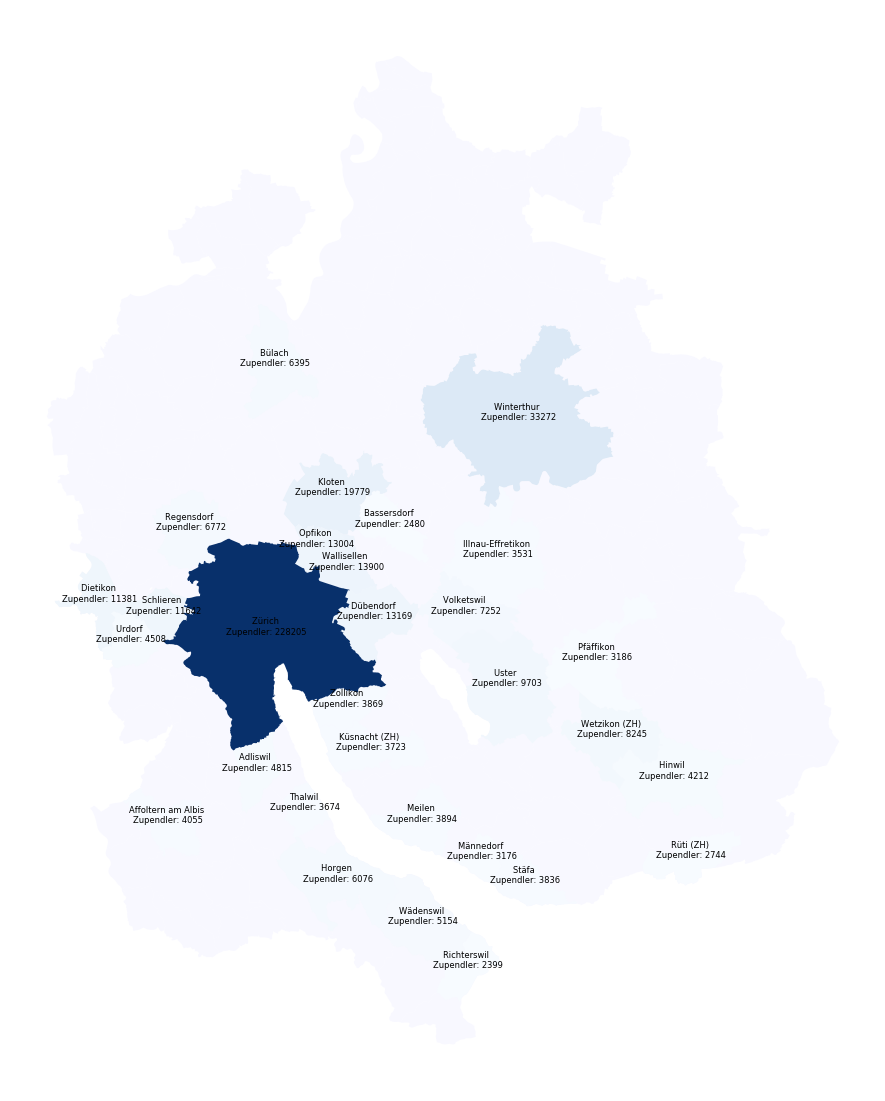

In [10]:
pendlerDataMergedZh = pendlerDataMerged[pendlerDataMerged['KT_KZ'].str.match('ZH')]
zh = ch[ch['KT_KZ'].str.match('ZH')]

#Plot Zürich
ax = zh.plot(color='ghostwhite',
            figsize=(20,20))

#Plot Gemeinden im Datensatz
pendlerDataMergedZh.plot(ax = ax, column='Zupendler', cmap = 'Blues')

#Labels
pendlerDataMergedZh.apply(lambda x: ax.annotate(s="%s \nZupendler: %s"%(x.NAME, x.Zupendler), 
                                              xy=x.geometry.centroid.coords[0], 
                                              ha='center', 
                                              color = 'black', 
                                              fontsize='small'),axis=1);

plt.box(False)
plt.axis('off')
plt.savefig('../Grafiken/zupendlerZh.pdf')

In [11]:
#Zentren und deren Zupendler
#Zentren fix nach Datensatz
zentren = ['Zürich', 'Bern', 'Basel', 'Lugano', 'Lausanne', 'Genève']
dfZentren = pd.DataFrame(zentren, columns=['NAME'])

#Zentren werden aus Datensatz CH ausgefiltert
pendlerZentrenMerge = pd.merge(pendlerDataMerged,dfZentren,on=['NAME'])

/Users/christian/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/geopandas/plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


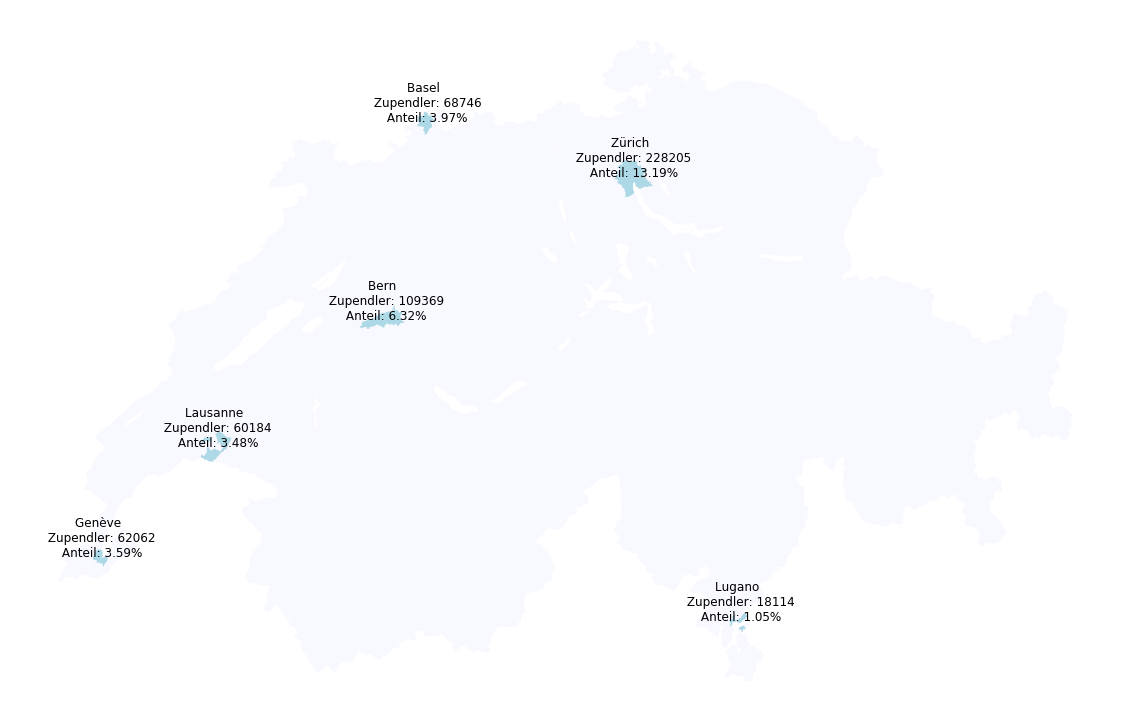

In [12]:
#Plot Schweiz
ax = ch.plot(color='ghostwhite',
            figsize=(20,20))

totalPendler = pendlerData['Total Arbeitspendler'].sum()
#Plot Gemeinden im Datensatz
pendlerZentrenMerge.plot(ax = ax, column='Zupendler', color='lightblue')

#Labels
pendlerZentrenMerge.apply(lambda x: ax.annotate(s="%s \n Zupendler: %s\n Anteil: %s"%(x.NAME, x.Zupendler,'{0:.2f}%'.format((x.Zupendler / totalPendler * 100))), 
                                              xy=x.geometry.centroid.coords[0], 
                                              ha='center', 
                                              color = 'black', 
                                              fontsize='large'),axis=1);

plt.box(False)
plt.axis('off')
plt.savefig('../Grafiken/pendlerZentren.pdf')

/Users/christian/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/geopandas/plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


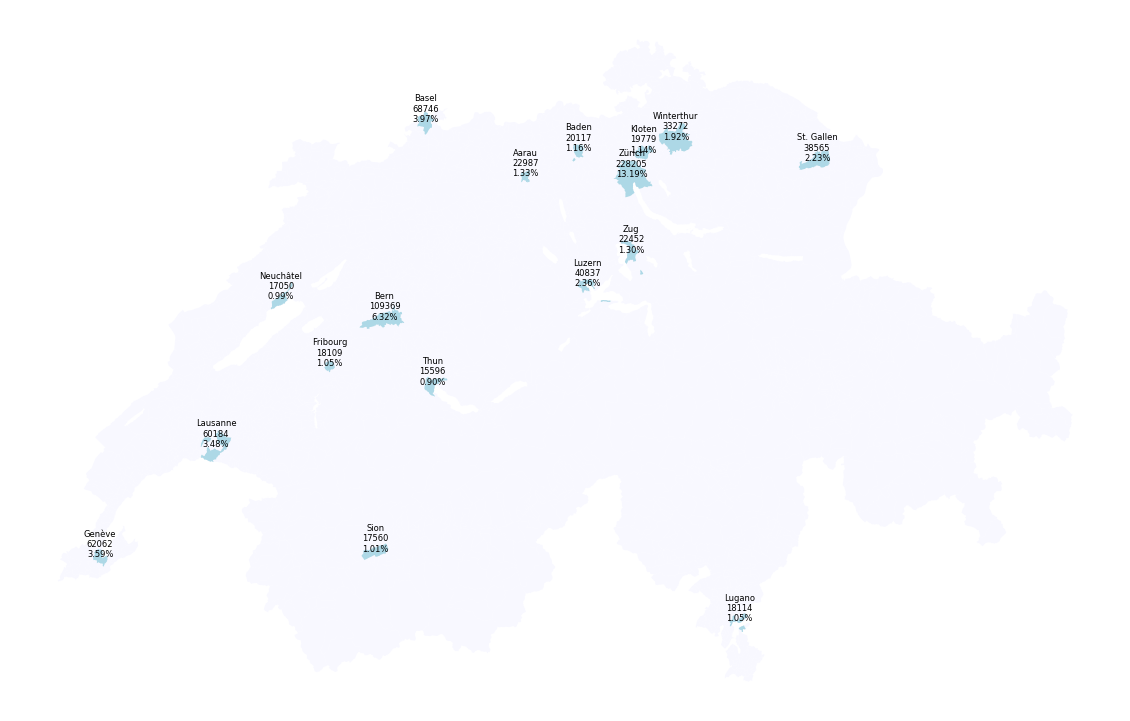

In [13]:
#Zentren grösser als xx tausend Zupendler
#TODO zentren könnten noch ausgeweitet werden: zB bi xy Minuten zu dem Zentrum giltet auch noch als Zentrum

pendlerGroesserAls = pendlerDataMerged[pendlerDataMerged['Zupendler'] > 15000]
totalPendler = pendlerData['Total Arbeitspendler'].sum()

#Plot Schweiz
ax = ch.plot(color='ghostwhite',
            figsize=(20,20))

#Plot Gemeinden im Datensatz
pendlerGroesserAls.plot(ax = ax, column='Zupendler', color='lightblue')

#Labels
pendlerGroesserAls.apply(lambda x: ax.annotate(s="%s\n%s\n%s"%(x.NAME, x.Zupendler,'{0:.2f}%'.format((x.Zupendler / totalPendler * 100))), 
                                              xy=x.geometry.centroid.coords[0], 
                                              ha='center', 
                                              color = 'black', 
                                              fontsize='small'),axis=1);

plt.box(False)
plt.axis('off')
plt.savefig('../Grafiken/pendlerZentrenMitMehrAls15000Zupendler.pdf')

/Users/christian/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/geopandas/plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


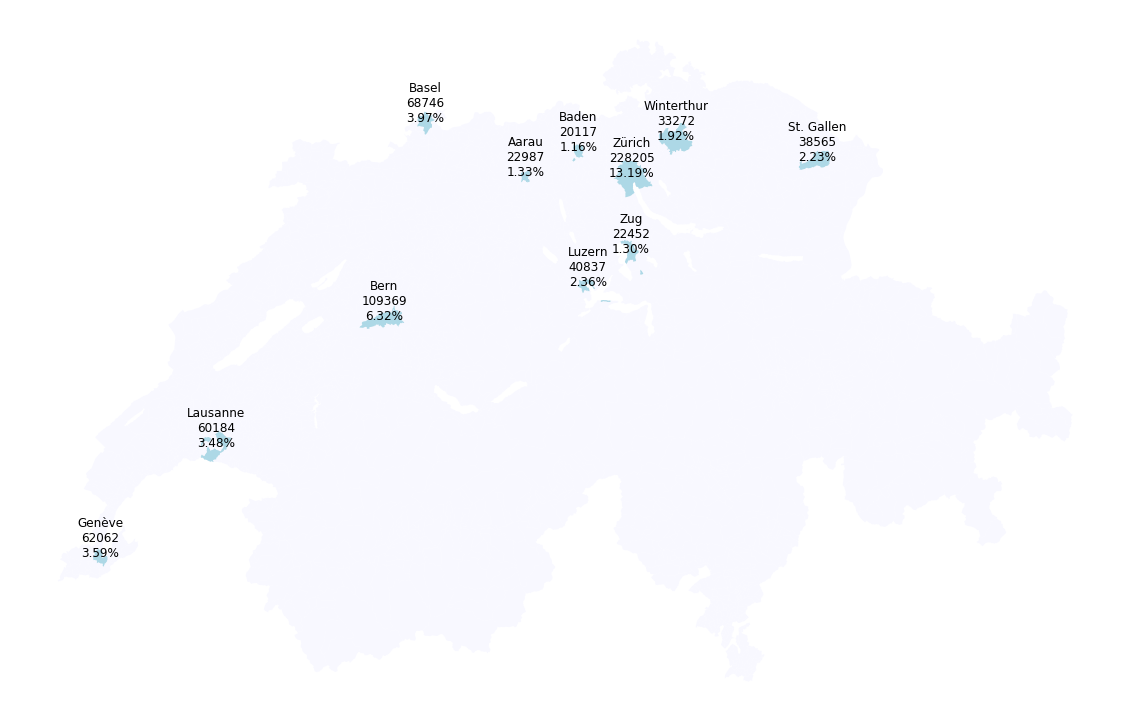

In [14]:
#Zentren grösser als xx tausend Zupendler
#TODO zentren könnten noch ausgeweitet werden: zB bi xy Minuten zu dem Zentrum giltet auch noch als Zentrum

pendlerGroesserAls = pendlerDataMerged[pendlerDataMerged['Zupendler'] > 20000]
totalPendler = pendlerData['Total Arbeitspendler'].sum()

#Plot Schweiz
ax = ch.plot(color='ghostwhite',
            figsize=(20,20))

#Plot Gemeinden im Datensatz
pendlerGroesserAls.plot(ax = ax, column='Zupendler', color='lightblue')

#Labels
pendlerGroesserAls.apply(lambda x: ax.annotate(s="%s\n%s\n%s"%(x.NAME, x.Zupendler,'{0:.2f}%'.format((x.Zupendler / totalPendler * 100))), 
                                              xy=x.geometry.centroid.coords[0], 
                                              ha='center', 
                                              color = 'black', 
                                              fontsize='large'),axis=1);

plt.box(False)
plt.axis('off')
plt.savefig('../Grafiken/pendlerZentrenMitMehrAls20000Zupendler.pdf')

/Users/christian/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/geopandas/plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


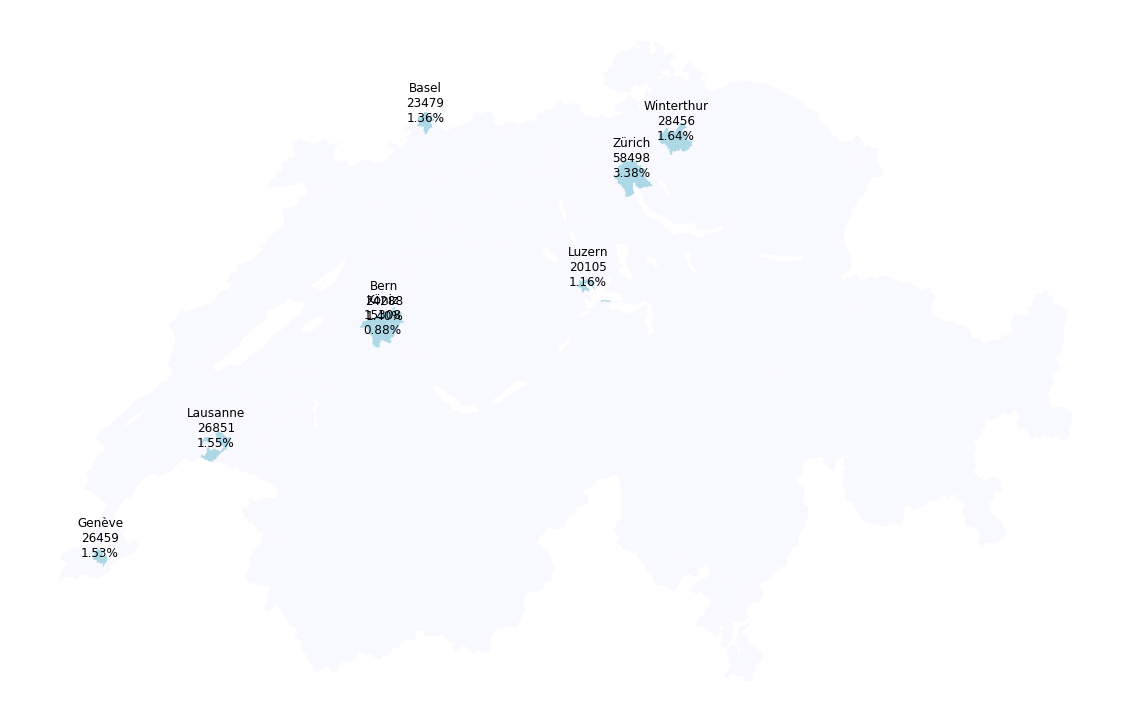

In [21]:
#Abpendler mehr als xx

#TODO zentren könnten noch ausgeweitet werden: zB bi xy Minuten zu dem Zentrum giltet auch noch als Zentrum

pendlerGroesserAls = pendlerDataMerged[pendlerDataMerged['Wegpendler'] > 15000]
totalPendler = pendlerData['Total Arbeitspendler'].sum()

#Plot Schweiz
ax = ch.plot(color='ghostwhite',
            figsize=(20,20))

#Plot Gemeinden im Datensatz
pendlerGroesserAls.plot(ax = ax, column='Wegpendler', color='lightblue')

#Labels
pendlerGroesserAls.apply(lambda x: ax.annotate(s="%s\n%s\n%s"%(x.NAME, x.Wegpendler,'{0:.2f}%'.format((x.Wegpendler / totalPendler * 100))), 
                                              xy=x.geometry.centroid.coords[0], 
                                              ha='center', 
                                              color = 'black', 
                                              fontsize='large'),axis=1);

plt.box(False)
plt.axis('off')
plt.savefig('../Grafiken/pendlerZentrenMitMehrAls15000Wegendler.pdf')